In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import as numpy



import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Tübitak.xlsx")

In [3]:
df.head()

,id,tarih,yorum,puan,donem,uygulama,guncelleme,guvenlik,icerik,kullanilabilirlik,performans,label_bertturkish,score_bertturkish,score_bertmultilingual,label_bertmultilingual
0,2,2019-05-17,uygulama kullanisli arayuz basit sade tek ekra...,5,Pandemi Öncesi,Türk Telekom,0,0,0,1,0,positive,0.976737,0.498254,5 stars
1,5,2019-08-09,uygulamanin tasarimini ben begeniyorum kolay r...,4,Pandemi Öncesi,Türk Telekom,0,0,0,1,0,negative,0.834968,0.361431,1 star
2,6,2019-05-24,i̇nternet konusunda cekim kalitesi kotu mobil ...,2,Pandemi Öncesi,Türk Telekom,0,0,0,0,1,negative,0.998915,0.389810,2 stars
3,7,2019-12-04,asim oldugu zaman gec haber veriyorlar tl m bi...,1,Pandemi Öncesi,Türk Telekom,1,0,0,0,0,negative,0.999247,0.817544,1 star
4,10,2019-11-30,surekli sebekede sikinti yasamaktan fazlasiyla...,1,Pandemi Öncesi,Türk Telekom,0,0,0,0,1,negative,0.997982,0.405441,1 star


In [26]:
güncelleme_tarihi = "2021-03-28" 

guncelleme_oncesi = df[df["tarih"] < güncelleme_tarihi]
guncelleme_sonrasi = df[df["tarih"] >= güncelleme_tarihi]

guncellemeoncesi_ortalama = guncelleme_oncesi.groupby("uygulama")["puan"].mean()
guncellemesonrasi_ortalama = guncelleme_sonrasi.groupby("uygulama")["puan"].mean()

uygulama = 'Instagram'
guncellemeoncesi_ortalama_uygulama = guncellemeoncesi_ortalama.get(uygulama, "Veri Yok")
guncellemesonrasi_ortalama_uygulama = guncellemesonrasi_ortalama.get(uygulama, "Veri Yok")

print(f"{uygulama} uygulamasının güncelleme önceki ortalama puanı: {guncellemeoncesi_ortalama_uygulama}")
print(f"{uygulama} uygulamasının güncelleme sonrası ortalama puanı: {guncellemesonrasi_ortalama_uygulama}")

Instagram uygulamasının güncelleme önceki ortalama puanı: 2.0612418787943336
Instagram uygulamasının güncelleme sonrası ortalama puanı: 2.1501003577973643


In [24]:
güncelleme_tarihi = "2021-03-25"

uygulama = "Netflix"

guncelleme_oncesi = df[(df["tarih"] < güncelleme_tarihi) & (df["uygulama"] == "Türk Telekom")]
guncelleme_sonrasi = df[(df["tarih"] >= güncelleme_tarihi) & (df["uygulama"] == "Türk Telekom")]

negatif_oncesi = len(guncelleme_oncesi[guncelleme_oncesi["label_bertturkish"] == "negative"])
negatif_sonrasi = len(guncelleme_sonrasi[guncelleme_sonrasi["label_bertturkish"] == "negative"])

pozitif_oncesi = len(guncelleme_oncesi[guncelleme_oncesi["label_bertturkish"] == "positive"])
pozitif_sonrasi = len(guncelleme_sonrasi[guncelleme_sonrasi["label_bertturkish"] == "positive"])

toplam_oncesi = negatif_oncesi + pozitif_oncesi
toplam_sonrasi = negatif_sonrasi + pozitif_sonrasi

if toplam_oncesi != 0:
    negatif_orani_oncesi = (negatif_oncesi / toplam_oncesi) * 100
    pozitif_orani_oncesi = (pozitif_oncesi / toplam_oncesi) * 100
else:
    negatif_orani_oncesi = 0
    pozitif_orani_oncesi = 0

if toplam_sonrasi != 0:
    negatif_orani_sonrasi = (negatif_sonrasi / toplam_sonrasi) * 100
    pozitif_orani_sonrasi = (pozitif_sonrasi / toplam_sonrasi) * 100
else:
    negatif_orani_sonrasi = 0
    pozitif_orani_sonrasi = 0

print("Güncelleme Öncesi:")
print(f"Negatif Yorum Oranı: {negatif_orani_oncesi:.2f}%")
print(f"Pozitif Yorum Oranı: {pozitif_orani_oncesi:.2f}%\n")

print("Güncelleme Sonrası:")
print(f"Negatif Yorum Oranı: {negatif_orani_sonrasi:.2f}%")
print(f"Pozitif Yorum Oranı: {pozitif_orani_sonrasi:.2f}%")


Güncelleme Öncesi:
Negatif Yorum Oranı: 79.48%
Pozitif Yorum Oranı: 20.52%

Güncelleme Sonrası:
Negatif Yorum Oranı: 82.59%
Pozitif Yorum Oranı: 17.41%


In [38]:
güncelleme_tarihi = "2021-03-25"

uygulama = "Netflix"

guncelleme_oncesi = df[(df["tarih"] < güncelleme_tarihi) & (df["uygulama"] == uygulama)]
guncelleme_sonrasi = df[(df["tarih"] >= güncelleme_tarihi) & (df["uygulama"] == uygulama)]

kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]
negatif_oncesi = {kategori: len(guncelleme_oncesi[(guncelleme_oncesi["label_bertturkish"] == "negative") & (guncelleme_oncesi[kategori] == 1)]) for kategori in kategoriler}
negatif_sonrasi = {kategori: len(guncelleme_sonrasi[(guncelleme_sonrasi["label_bertturkish"] == "negative") & (guncelleme_sonrasi[kategori] == 1)]) for kategori in kategoriler}
pozitif_oncesi = {kategori: len(guncelleme_oncesi[(guncelleme_oncesi["label_bertturkish"] == "positive") & (guncelleme_oncesi[kategori] == 1)]) for kategori in kategoriler}
pozitif_sonrasi = {kategori: len(guncelleme_sonrasi[(guncelleme_sonrasi["label_bertturkish"] == "positive") & (guncelleme_sonrasi[kategori] == 1)]) for kategori in kategoriler}

toplam_oncesi = {kategori: negatif_oncesi[kategori] + pozitif_oncesi[kategori] for kategori in kategoriler}
toplam_sonrasi = {kategori: negatif_sonrasi[kategori] + pozitif_sonrasi[kategori] for kategori in kategoriler}

negatif_oran_oncesi = {kategori: (negatif_oncesi[kategori] / toplam_oncesi[kategori]) * 100 if toplam_oncesi[kategori] != 0 else 0 for kategori in kategoriler}
pozitif_oran_oncesi = {kategori: (pozitif_oncesi[kategori] / toplam_oncesi[kategori]) * 100 if toplam_oncesi[kategori] != 0 else 0 for kategori in kategoriler}
negatif_oran_sonrasi = {kategori: (negatif_sonrasi[kategori] / toplam_sonrasi[kategori]) * 100 if toplam_sonrasi[kategori] != 0 else 0 for kategori in kategoriler}
pozitif_oran_sonrasi = {kategori: (pozitif_sonrasi[kategori] / toplam_sonrasi[kategori]) * 100 if toplam_sonrasi[kategori] != 0 else 0 for kategori in kategoriler}

print("Güncelleme Öncesi:")
for kategori in kategoriler:
    print(f"{kategori.capitalize()} İçin Negatif Yorum Oranı: {negatif_oran_oncesi[kategori]:.2f}%")
    print(f"{kategori.capitalize()} İçin Pozitif Yorum Oranı: {pozitif_oran_oncesi[kategori]:.2f}%")
    print()

print("Güncelleme Sonrası")
for kategori in kategoriler:
    print(f"{kategori.capitalize()} İçin Negatif Yorum Oranı: {negatif_oran_sonrasi[kategori]:.2f}%")
    print(f"{kategori.capitalize()} İçin Pozitif Yorum Oranı: {pozitif_oran_sonrasi[kategori]:.2f}%")
    print()


Güncelleme Öncesi:
Icerik İçin Negatif Yorum Oranı: 69.99%
Icerik İçin Pozitif Yorum Oranı: 30.01%

Performans İçin Negatif Yorum Oranı: 82.27%
Performans İçin Pozitif Yorum Oranı: 17.73%

Kullanilabilirlik İçin Negatif Yorum Oranı: 70.71%
Kullanilabilirlik İçin Pozitif Yorum Oranı: 29.29%

Guvenlik İçin Negatif Yorum Oranı: 91.41%
Guvenlik İçin Pozitif Yorum Oranı: 8.59%

Guncelleme İçin Negatif Yorum Oranı: 91.60%
Guncelleme İçin Pozitif Yorum Oranı: 8.40%

Güncelleme Sonrası
Icerik İçin Negatif Yorum Oranı: 77.34%
Icerik İçin Pozitif Yorum Oranı: 22.66%

Performans İçin Negatif Yorum Oranı: 88.24%
Performans İçin Pozitif Yorum Oranı: 11.76%

Kullanilabilirlik İçin Negatif Yorum Oranı: 69.90%
Kullanilabilirlik İçin Pozitif Yorum Oranı: 30.10%

Guvenlik İçin Negatif Yorum Oranı: 90.91%
Guvenlik İçin Pozitif Yorum Oranı: 9.09%

Guncelleme İçin Negatif Yorum Oranı: 92.70%
Guncelleme İçin Pozitif Yorum Oranı: 7.30%



In [25]:
uygulama_yorum_sayisi = df["uygulama"].value_counts()

print("Her Uygulamadan Yorum Sayısı:")
print(uygulama_yorum_sayisi)

Her Uygulamadan Yorum Sayısı:
uygulama
PUBG             34815
Whatsapp         31561
Türk Telekom     24837
Trendyol         21368
Instagram        20848
YouTube          20441
Ziraat Mobile    14935
Hepsiburada      13906
Twitter           9769
Getir             9536
Netflix           6237
Name: count, dtype: int64


In [26]:
uygulama_yorum_sayisi = df["uygulama"].value_counts()

toplam_yorum = uygulama_yorum_sayisi.sum()

print("Her Uygulamadan Yorum Sayısı:")
print(uygulama_yorum_sayisi)
print("\nToplam Yorum Sayısı:", toplam_yorum)


Her Uygulamadan Yorum Sayısı:
uygulama
PUBG             34815
Whatsapp         31561
Türk Telekom     24837
Trendyol         21368
Instagram        20848
YouTube          20441
Ziraat Mobile    14935
Hepsiburada      13906
Twitter           9769
Getir             9536
Netflix           6237
Name: count, dtype: int64

Toplam Yorum Sayısı: 208253


In [32]:
uygulama_yorum_sayisi = data["uygulamaid"].value_counts()

toplam_yorum = uygulama_yorum_sayisi.sum()

print("Her Uygulamadan Yorum Sayısı:")
print(uygulama_yorum_sayisi)
print("\nToplam Yorum Sayısı:", toplam_yorum)

Her Uygulamadan Yorum Sayısı:
uygulamaid
1     195803
2     113458
3     110054
4      89957
5      84630
6      83819
7      58011
8      55071
9      46285
10     37099
11     33992
Name: count, dtype: int64

Toplam Yorum Sayısı: 908179


In [10]:

pandemi_oncesi = df[df["donem"] == "Pandemi Öncesi"]
pandemi = df[df["donem"] == "Pandemi"]
pandemi_sonrasi = df[df["donem"] == "Pandemi Sonrası"]

pandemioncesi_ortalama = pandemi_oncesi.groupby("uygulama")["puan"].mean()
pandemi_ortalama = pandemi.groupby("uygulama")["puan"].mean()
pandemisonrasi_ortalama = pandemi_sonrasi.groupby("uygulama")["puan"].mean()

uygulama = 'Instagram'
pandemioncesi_ortalama_uygulama = pandemioncesi_ortalama.get(uygulama, "Veri Yok")
pandemi_ortalama_uygulama = pandemi_ortalama.get(uygulama, "Veri Yok")
pandemisonrasi_ortalama_uygulama = pandemisonrasi_ortalama.get(uygulama, "Veri Yok")

print(f"{uygulama} uygulamasının pandemi öncesi ortalama puanı: {pandemioncesi_ortalama_uygulama}")
print(f"{uygulama} uygulamasının pandemide ortalama puanı: {pandemi_ortalama_uygulama}")
print(f"{uygulama} uygulamasının pandemi sonrası ortalama puanı: {pandemisonrasi_ortalama_uygulama}")

Instagram uygulamasının pandemi öncesi ortalama puanı: Veri Yok
Instagram uygulamasının pandemide ortalama puanı: Veri Yok
Instagram uygulamasının pandemi sonrası ortalama puanı: Veri Yok


In [6]:
df["donem"].value_counts()

donem
Pandemi             98200
Pandemi Sonrası     66470
Pandemi Öncesi      43583
Name: count, dtype: int64

C:\Users\ogzhn\AppData\Local\Temp\ipykernel_24160\1535898710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df["tarih"] = pd.to_datetime(twitter_df["tarih"], errors='coerce')


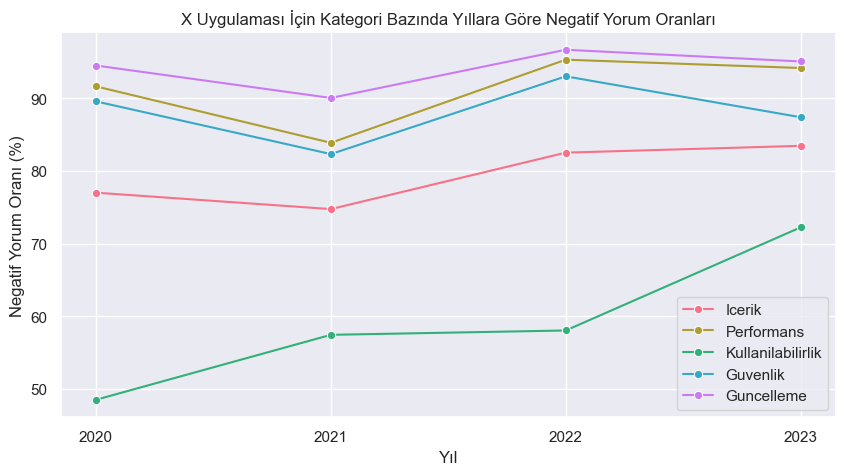

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

twitter_df = df[df["uygulamaid"] == 8]
twitter_df["tarih"] = pd.to_datetime(twitter_df["tarih"], errors='coerce')
twitter_df = twitter_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for yil in range(2020, 2024):  
    for kategori in kategoriler:
        yil_filtre = twitter_df[(twitter_df["tarih"].dt.year == yil) & (twitter_df[kategori] == 1)]
        toplam_yorum_sayisi = len(yil_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(yil_filtre[yil_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

sns.set_theme(style="darkgrid")
renkler = sns.color_palette("husl", len(kategoriler))


plt.figure(figsize=(10, 5))
for i, (kategori, oranlar) in enumerate(negatif_oranlar.items()):
    sns.lineplot(x=range(2020, 2024), y=oranlar, marker='o', label=f"{kategori.capitalize()}", color=renkler[i])
plt.title('X Uygulaması İçin Kategori Bazında Yıllara Göre Negatif Yorum Oranları')
plt.xlabel('Yıl')
plt.ylabel('Negatif Yorum Oranı (%)')
plt.xticks(range(2020, 2024))
plt.grid(True)
plt.legend()
plt.show()


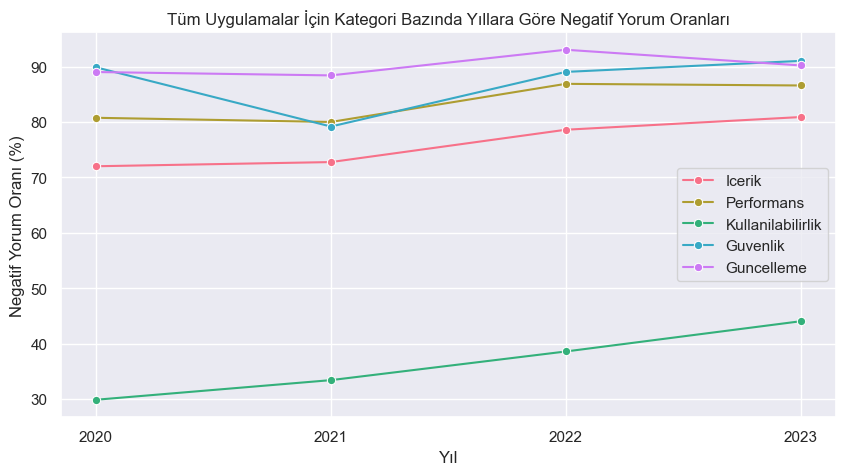

In [22]:
veri_df = df.copy()
veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for yil in range(2020, 2024):  
    for kategori in kategoriler:
        yil_filtre = veri_df[(veri_df["tarih"].dt.year == yil) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(yil_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(yil_filtre[yil_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

sns.set_theme(style="darkgrid")
renkler = sns.color_palette("husl", len(kategoriler))


plt.figure(figsize=(10, 5))
for i, (kategori, oranlar) in enumerate(negatif_oranlar.items()):
    sns.lineplot(x=range(2020, 2024), y=oranlar, marker='o', label=f"{kategori.capitalize()}", color=renkler[i])
plt.title('Tüm Uygulamalar İçin Kategori Bazında Yıllara Göre Negatif Yorum Oranları')
plt.xlabel('Yıl')
plt.ylabel('Negatif Yorum Oranı (%)')ü
plt.xticks(range(2020, 2024))
plt.grid(True)
plt.legend()
plt.show()


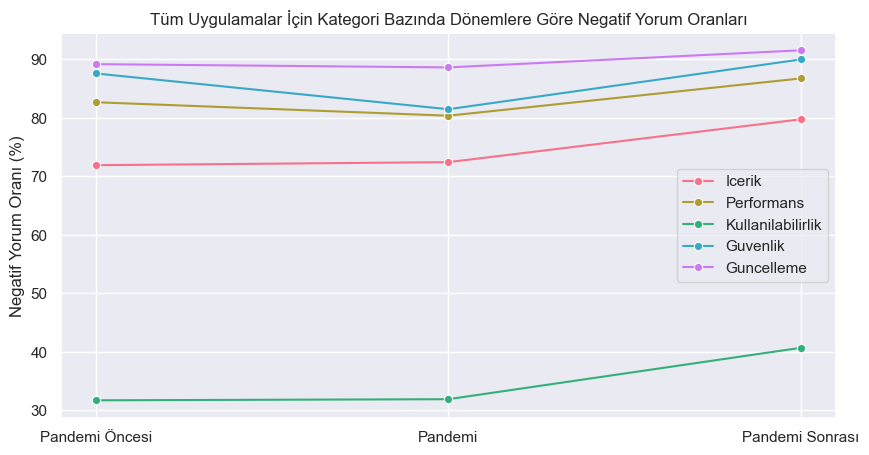

In [13]:
veri_df = df.copy()
veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for donem in range(1, 4):  
    for kategori in kategoriler:
        donem_filtre = veri_df[(veri_df["donem"] == donem) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(donem_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(donem_filtre[donem_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

sns.set_theme(style="darkgrid")
renkler = sns.color_palette("husl", len(kategoriler))

plt.figure(figsize=(10, 5))
for i, (kategori, oranlar) in enumerate(negatif_oranlar.items()):
    sns.lineplot(x=["Pandemi Öncesi", "Pandemi", "Pandemi Sonrası"], y=oranlar, marker='o', label=f"{kategori.capitalize()}", color=renkler[i])
plt.title('Tüm Uygulamalar İçin Kategori Bazında Dönemlere Göre Negatif Yorum Oranları')
plt.xlabel('')
plt.ylabel('Negatif Yorum Oranı (%)')
plt.grid(True)
plt.legend()
plt.show()


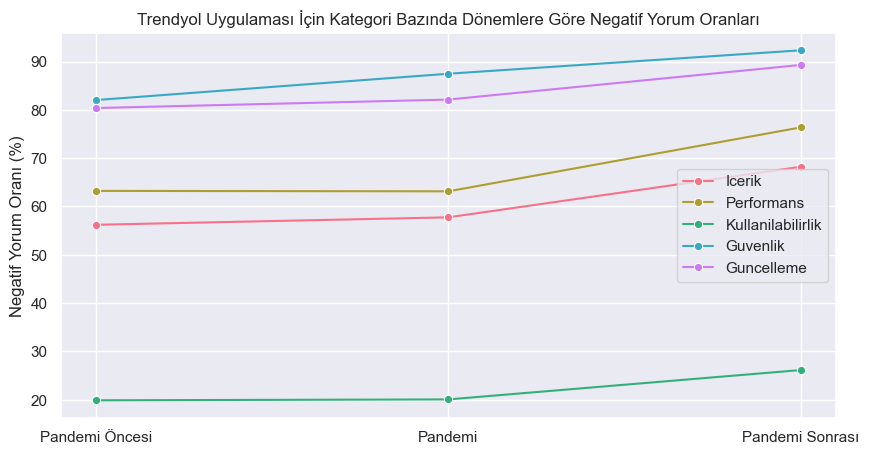

In [15]:
veri_df = df.copy()

veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])

hedef_uygulama_id = 6

kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for donem in range(1, 4):  
    for kategori in kategoriler:
        donem_filtre = veri_df[(veri_df["donem"] == donem) & (veri_df["uygulamaid"] == hedef_uygulama_id) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(donem_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(donem_filtre[donem_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

sns.set_theme(style="darkgrid")
renkler = sns.color_palette("husl", len(kategoriler))

plt.figure(figsize=(10, 5))

for i, (kategori, oranlar) in enumerate(negatif_oranlar.items()):
    sns.lineplot(x=["Pandemi Öncesi", "Pandemi", "Pandemi Sonrası"], y=oranlar, marker='o', label=f"{kategori.capitalize()}", color=renkler[i])

plt.title(f'Trendyol Uygulaması İçin Kategori Bazında Dönemlere Göre Negatif Yorum Oranları')
plt.xlabel('')
plt.ylabel('Negatif Yorum Oranı (%)')
plt.grid(True)
plt.legend()
plt.show()


In [17]:
veri_df = df.copy()
veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for donem in range(1, 4):  
    for kategori in kategoriler:
        donem_filtre = veri_df[(veri_df["donem"] == donem) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(donem_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(donem_filtre[donem_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

donemler = ["Pandemi Öncesi", "Pandemi", "Pandemi Sonrası"]

for kategori, oranlar in negatif_oranlar.items():
    print(f"{kategori.capitalize()} kategorisi için negatif oranlar:")
    for donem, oran in zip(donemler, oranlar):
        print(f"  {donem}: {oran:.2f}%")


Icerik kategorisi için negatif oranlar:
  Pandemi Öncesi: 71.91%
  Pandemi: 72.42%
  Pandemi Sonrası: 79.74%
Performans kategorisi için negatif oranlar:
  Pandemi Öncesi: 82.66%
  Pandemi: 80.36%
  Pandemi Sonrası: 86.72%
Kullanilabilirlik kategorisi için negatif oranlar:
  Pandemi Öncesi: 31.74%
  Pandemi: 31.93%
  Pandemi Sonrası: 40.70%
Guvenlik kategorisi için negatif oranlar:
  Pandemi Öncesi: 87.57%
  Pandemi: 81.46%
  Pandemi Sonrası: 89.96%
Guncelleme kategorisi için negatif oranlar:
  Pandemi Öncesi: 89.16%
  Pandemi: 88.61%
  Pandemi Sonrası: 91.53%


In [19]:
veri_df = df.copy()

veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])

hedef_uygulama_id = 6  

kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]
donemler = ["Pandemi Öncesi", "Pandemi", "Pandemi Sonrası"]

negatif_oranlar = {kategori: {donem: None for donem in donemler} for kategori in kategoriler}

for donem_index, donem in enumerate(donemler, start=1):  
    for kategori in kategoriler:
        donem_filtre = veri_df[(veri_df["donem"] == donem_index) & (veri_df["uygulamaid"] == hedef_uygulama_id) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(donem_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(donem_filtre[donem_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori][donem] = negatif_oran

for kategori, donem_oranları in negatif_oranlar.items():
    print(f" Trenyol uygulamasının {kategori.capitalize()} kategorisi için negatif oranlar:")
    for donem, oran in donem_oranları.items():
        print(f"  {donem}: {oran:.2f}%")


 Trenyol uygulamasının Icerik kategorisi için negatif oranlar:
  Pandemi Öncesi: 56.21%
  Pandemi: 57.76%
  Pandemi Sonrası: 68.21%
 Trenyol uygulamasının Performans kategorisi için negatif oranlar:
  Pandemi Öncesi: 63.23%
  Pandemi: 63.14%
  Pandemi Sonrası: 76.36%
 Trenyol uygulamasının Kullanilabilirlik kategorisi için negatif oranlar:
  Pandemi Öncesi: 19.88%
  Pandemi: 20.07%
  Pandemi Sonrası: 26.14%
 Trenyol uygulamasının Guvenlik kategorisi için negatif oranlar:
  Pandemi Öncesi: 82.03%
  Pandemi: 87.48%
  Pandemi Sonrası: 92.33%
 Trenyol uygulamasının Guncelleme kategorisi için negatif oranlar:
  Pandemi Öncesi: 80.38%
  Pandemi: 82.13%
  Pandemi Sonrası: 89.29%


In [23]:
twitter_df = df[df["uygulamaid"] == 8]
twitter_df["tarih"] = pd.to_datetime(twitter_df["tarih"], errors='coerce')
twitter_df = twitter_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for yil in range(2020, 2024):  
    for kategori in kategoriler:
        yil_filtre = twitter_df[(twitter_df["tarih"].dt.year == yil) & (twitter_df[kategori] == 1)]
        toplam_yorum_sayisi = len(yil_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(yil_filtre[yil_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

for kategori, oranlar in negatif_oranlar.items():
    print(f"{kategori.capitalize()} kategorisi için negatif oranlar:")
    for i, oran in enumerate(oranlar):
        yil = 2020 + i
        print(f"  {yil}: {oran:.2f}%")
    print()


Icerik kategorisi için negatif oranlar:
  2020: 77.00%
  2021: 74.74%
  2022: 82.51%
  2023: 83.45%

Performans kategorisi için negatif oranlar:
  2020: 91.64%
  2021: 83.87%
  2022: 95.32%
  2023: 94.17%

Kullanilabilirlik kategorisi için negatif oranlar:
  2020: 48.48%
  2021: 57.43%
  2022: 58.02%
  2023: 72.22%

Guvenlik kategorisi için negatif oranlar:
  2020: 89.57%
  2021: 82.32%
  2022: 93.02%
  2023: 87.39%

Guncelleme kategorisi için negatif oranlar:
  2020: 94.51%
  2021: 90.05%
  2022: 96.68%
  2023: 95.07%



C:\Users\ogzhn\AppData\Local\Temp\ipykernel_24160\410565413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df["tarih"] = pd.to_datetime(twitter_df["tarih"], errors='coerce')


In [25]:
veri_df = df.copy()
veri_df["tarih"] = pd.to_datetime(veri_df["tarih"], errors='coerce')
veri_df = veri_df.dropna(subset=["tarih"])
kategoriler = ["icerik", "performans", "kullanilabilirlik", "guvenlik", "guncelleme"]

negatif_oranlar = {kategori: [] for kategori in kategoriler}

for yil in range(2020, 2024):  
    for kategori in kategoriler:
        yil_filtre = veri_df[(veri_df["tarih"].dt.year == yil) & (veri_df[kategori] == 1)]
        toplam_yorum_sayisi = len(yil_filtre)
        if toplam_yorum_sayisi != 0:
            negatif_yorum_sayisi = len(yil_filtre[yil_filtre["label"] == "negative"])
            negatif_oran = (negatif_yorum_sayisi / toplam_yorum_sayisi) * 100
        else:
            negatif_oran = 0
        negatif_oranlar[kategori].append(negatif_oran)

for kategori, oranlar in negatif_oranlar.items():
    eksik_indeksler = [i for i, oran in enumerate(oranlar) if pd.isna(oran)]
    medyan = np.nanmedian(oranlar)
    for indeks in eksik_indeksler:
        negatif_oranlar[kategori][indeks] = medyan

for kategori, oranlar in negatif_oranlar.items():
    print(f"{kategori.capitalize()} kategorisi için negatif oranlar:")
    for i, oran in enumerate(oranlar):
        yil = 2020 + i
        print(f"  {yil}: {oran:.2f}%")
    print()


Icerik kategorisi için negatif oranlar:
  2020: 72.01%
  2021: 72.76%
  2022: 78.60%
  2023: 80.89%

Performans kategorisi için negatif oranlar:
  2020: 80.75%
  2021: 80.00%
  2022: 86.88%
  2023: 86.59%

Kullanilabilirlik kategorisi için negatif oranlar:
  2020: 29.87%
  2021: 33.41%
  2022: 38.58%
  2023: 44.03%

Guvenlik kategorisi için negatif oranlar:
  2020: 89.86%
  2021: 79.17%
  2022: 89.03%
  2023: 91.02%

Guncelleme kategorisi için negatif oranlar:
  2020: 89.01%
  2021: 88.40%
  2022: 93.03%
  2023: 90.20%

